In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import plotly.graph_objs as go
import yfinance as yf
start='1980-01-01'
end='2022-11-21'

In [2]:
df=data.DataReader('TSLA','yahoo',start,end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,1.666667,1.169333,1.266667,1.592667,281494500.0,1.592667
2010-06-30,2.028000,1.553333,1.719333,1.588667,257806500.0,1.588667
2010-07-01,1.728000,1.351333,1.666667,1.464000,123282000.0,1.464000
2010-07-02,1.540000,1.247333,1.533333,1.280000,77097000.0,1.280000
2010-07-06,1.333333,1.055333,1.333333,1.074000,103003500.0,1.074000
...,...,...,...,...,...,...
2022-11-15,200.820007,192.059998,195.880005,194.419998,91293800.0,194.419998
2022-11-16,192.570007,185.660004,191.509995,186.919998,66567600.0,186.919998
2022-11-17,186.160004,180.899994,183.960007,183.169998,64336000.0,183.169998


In [3]:
df=df.reset_index()
df=df.drop(['Date','Adj Close'],axis=1)

In [4]:
ma200 =df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3118    271.384784
3119    270.767300
3120    270.173717
3121    269.589434
3122    268.919521
Name: Close, Length: 3123, dtype: float64

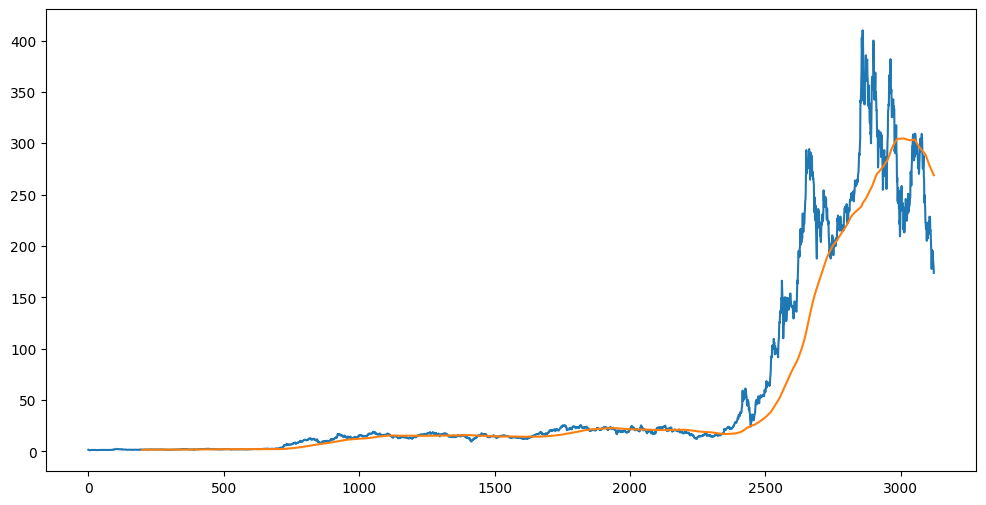

In [5]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200)

In [6]:
train=pd.DataFrame(df['Close'])
print(train.shape)

(3123, 1)


In [7]:
test = yf.download(tickers='TSLA', period='5d', interval='5m')
test

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-11-15 09:30:00,195.880005,197.750000,194.410004,195.619995,195.619995,7431285
2022-11-15 09:35:00,195.690002,197.559998,195.110001,195.190002,195.190002,2290497
2022-11-15 09:40:00,195.190002,198.949997,195.140106,197.258194,197.258194,3103661
2022-11-15 09:45:00,197.190002,198.000000,195.500000,196.710007,196.710007,2121957
2022-11-15 09:50:00,196.710007,197.990005,196.623795,197.108597,197.108597,1736400
...,...,...,...,...,...,...
2022-11-21 10:00:00,174.125000,174.169998,173.399994,173.865005,173.865005,1302665
2022-11-21 10:05:00,173.884995,174.149994,173.399994,174.149994,174.149994,1257517
2022-11-21 10:10:00,174.139999,174.289993,173.570007,173.692398,173.692398,1026606


In [8]:
test=test.reset_index()
test=test.drop(['Datetime','Adj Close'],axis=1)
test=pd.DataFrame(test['Close'])
print(test.shape)

(323, 1)


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train1=scaler.fit_transform(train)
train1.shape

(3123, 1)

In [10]:
x_train=[]
y_train=[]

for i in range(100,train1.shape[0]):
    x_train.append(train1[i-100:i])
    y_train.append(train1[i,0])
    
    
x_train,y_train=np.array(x_train),np.array(y_train)

In [11]:
x_train.shape

(3023, 100, 1)

In [12]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=70,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=90,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


2022-11-21 21:09:19.437070: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-21 21:09:25.766957: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 70)           36680     
                                                                 
 dropout_2 (Dropout)         (None, 100, 70)           0         
                                                                 
 lstm_3 (LSTM)               (None, 90)                5

In [14]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
95/95 [==============================] - 30s 264ms/step - loss: 0.0113
Epoch 2/50
95/95 [==============================] - 26s 273ms/step - loss: 0.0041
Epoch 3/50
95/95 [==============================] - 27s 284ms/step - loss: 0.0038
Epoch 4/50
95/95 [==============================] - 38s 399ms/step - loss: 0.0034
Epoch 5/50
95/95 [==============================] - 40s 416ms/step - loss: 0.0031
Epoch 6/50
95/95 [==============================] - 48s 503ms/step - loss: 0.0029
Epoch 7/50
95/95 [==============================] - 38s 393ms/step - loss: 0.0033
Epoch 8/50
95/95 [==============================] - 28s 300ms/step - loss: 0.0028
Epoch 9/50
95/95 [==============================] - 35s 375ms/step - loss: 0.0028
Epoch 10/50
95/95 [==============================] - 40s 423ms/step - loss: 0.0032
Epoch 11/50
95/95 [==============================] - 36s 383ms/step - loss: 0.0028
Epoch 12/50
95/95 [==============================] - 32s 341ms/step - loss: 0.0028
Epoch 13/50
9

In [15]:
prev100=train
final_df=prev100.append(test,ignore_index=True)

/var/folders/hs/56d9rzvx749b_h_539d8s4nh0000gn/T/ipykernel_3469/697644516.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=prev100.append(test,ignore_index=True)


In [16]:
input_data=scaler.fit_transform(final_df)
input_data.shape

(3446, 1)

In [17]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)
y_pred=model.predict(x_test)

(3346, 100, 1)
(3346,)
105/105 [==============================] - 6s 52ms/step


In [18]:
y_pred.shape

(3346, 1)

In [19]:
scaler.scale_

array([0.00244549])

In [20]:
scale_f=1/float(scaler.scale_)
y_pred=y_pred*scale_f
y_test=y_pred*scale_f

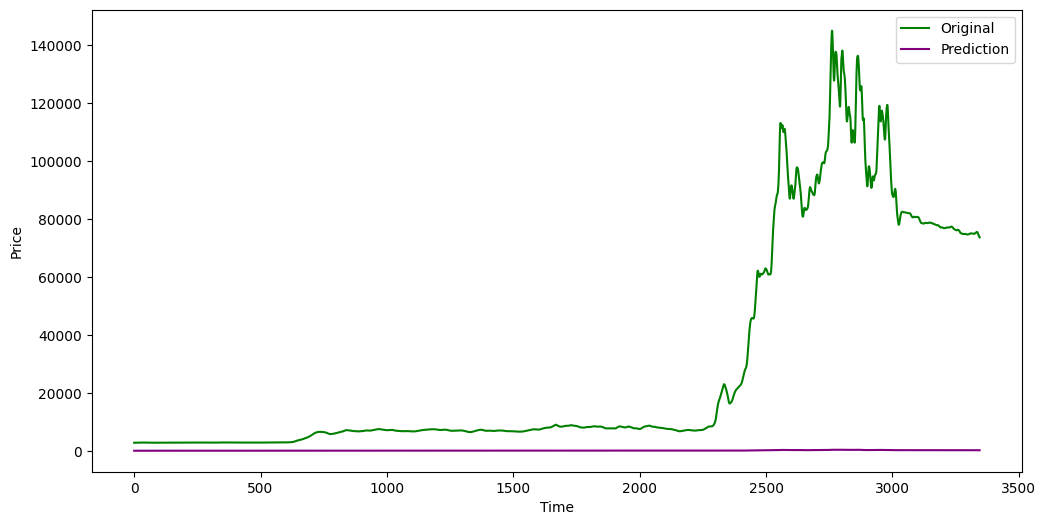

In [21]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'green',label='Original')
plt.plot(y_pred,'purple',label='Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [22]:
model.save('keras_model.h5')